In [ ]:
# function to connect colab with drive
def connectWithDrive():
    # connecting colab with google drive
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)


In [ ]:
# libraries imported
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

In [ ]:
# function to read data from drive
def readData():
    # reading training and testting data
    data = pd.read_csv("/content/drive/MyDrive/neyma_data/adni_ixi_rois_data_raw.csv", index_col=False)
    return data

In [ ]:
connectWithDrive()
data = readData()

Mounted at /content/drive


In [ ]:
data.head() # this is the data, which will be divided into two parts : 1. training dataset and 2. testing dataset

lh_bankssts_area  lh_caudalanteriorcingulate_area  \
0               879                              528   
1               845                              525   
2               884                              605   
3               846                              612   
4               834                              324   

   lh_caudalmiddlefrontal_area  lh_cuneus_area  lh_entorhinal_area  \
0                         1968            1072                 253   
1                         1892            1064                 285   
2                         2093            1449                 524   
3                         2035            1485                 521   
4                         2140            1518                 309   

   lh_fusiform_area  lh_inferiorparietal_area  lh_inferiortemporal_area  \
0              2307                      3573                      2445   
1              2232                      3670                      2383   
2              3174                      4500                      3532   
3              3223                      4575                      3549   
4              2555                      3862                      2287   

   lh_isthmuscingulate_area  lh_lateraloccipital_area  ...   right_CA4  \
0                       778                      3762  ...  139.364354   
1                       671                      3692  ...  131.674971   
2                      1060                      4724  ...  239.586157   
3                      1077                      4810  ...  237.059429   
4                       999                      3926  ...  176.551033   

   right_fimbria  right_HATA  right_Whole_hippocampus  Study         SID  \
0      46.105687   30.590374              1762.601968   ADNI  100_S_0893   
1      41.631790   32.048392              1747.481860   ADNI  100_S_0893   
2      35.914880   60.608920              3047.069487   ADNI  100_S_1062   
3      33.613058   59.398536              3059.777462   ADNI  100_S_1062   
4      32.096342   34.127632              2208.919115   ADNI  100_S_1113   

   total CNR  Gender  Research Group   Age  
0      1.444       F              AD  85.9  
1      1.429       F              AD  85.9  
2      1.703       M              AD  82.0  
3      1.700       M              AD  82.0  
4      1.442       F              AD  79.3  

[5 rows x 429 columns]

In [ ]:
# dimension of our data (A pandas dataframe)
data.shape

(2436, 429)

In [ ]:
# trying to drop all rows which has NAN values
data.dropna()
# Hence, no NA values

lh_bankssts_area  lh_caudalanteriorcingulate_area  \
0                  879                              528   
1                  845                              525   
2                  884                              605   
3                  846                              612   
4                  834                              324   
...                ...                              ...   
2431               807                              431   
2432               924                              732   
2433               914                              685   
2434               924                              660   
2435               973                              619   

      lh_caudalmiddlefrontal_area  lh_cuneus_area  lh_entorhinal_area  \
0                            1968            1072                 253   
1                            1892            1064                 285   
2                            2093            1449                 524   
3                            2035            1485                 521   
4                            2140            1518                 309   
...                           ...             ...                 ...   
2431                         1541            1268                 445   
2432                         1507            1265                 348   
2433                         1501            1247                 329   
2434                         1895            1285                 325   
2435                         1847            1242                 381   

      lh_fusiform_area  lh_inferiorparietal_area  lh_inferiortemporal_area  \
0                 2307                      3573                      2445   
1                 2232                      3670                      2383   
2                 3174                      4500                      3532   
3                 3223                      4575                      3549   
4                 2555                      3862                      2287   
...                ...                       ...                       ...   
2431              2722                      3110                      2451   
2432              2574                      3474                      2666   
2433              2655                      3504                      2666   
2434              2876                      4129                      3256   
2435              2838                      4037                      3094   

      lh_isthmuscingulate_area  lh_lateraloccipital_area  ...   right_CA4  \
0                          778                      3762  ...  139.364354   
1                          671                      3692  ...  131.674971   
2                         1060                      4724  ...  239.586157   
3                         1077                      4810  ...  237.059429   
4                          999                      3926  ...  176.551033   
...                        ...                       ...  ...         ...   
2431                       975                      4025  ...  190.917935   
2432                       820                      3933  ...  248.101851   
2433                       854                      3925  ...  234.373190   
2434                       862                      4329  ...  215.628260   
2435                       801                      4255  ...  223.665495   

      right_fimbria  right_HATA  right_Whole_hippocampus  Study         SID  \
0         46.105687   30.590374              1762.601968   ADNI  100_S_0893   
1         41.631790   32.048392              1747.481860   ADNI  100_S_0893   
2         35.914880   60.608920              3047.069487   ADNI  100_S_1062   
3         33.613058   59.398536              3059.777462   ADNI  100_S_1062   
4         32.096342   34.127632              2208.919115   ADNI  100_S_1113   
...             ...         ...                      ...    ...         ...   
2431 

In [ ]:
# splitting data into X, y
def splitData(data):
    # dropping index column
    y = data['Research Group'] # the classes
    X = data.drop(data.columns[[424, 427]], axis=1)  # df.columns is zero-based pd.Index 
    # data.columns[[0, 427]]
    return X, y

In [ ]:
X, y = splitData(data)

In [ ]:
X.head() # training data top 5 rows after dropping useless columns for modelling

lh_bankssts_area  lh_caudalanteriorcingulate_area  \
0               879                              528   
1               845                              525   
2               884                              605   
3               846                              612   
4               834                              324   

   lh_caudalmiddlefrontal_area  lh_cuneus_area  lh_entorhinal_area  \
0                         1968            1072                 253   
1                         1892            1064                 285   
2                         2093            1449                 524   
3                         2035            1485                 521   
4                         2140            1518                 309   

   lh_fusiform_area  lh_inferiorparietal_area  lh_inferiortemporal_area  \
0              2307                      3573                      2445   
1              2232                      3670                      2383   
2              3174                      4500                      3532   
3              3223                      4575                      3549   
4              2555                      3862                      2287   

   lh_isthmuscingulate_area  lh_lateraloccipital_area  ...  right_GC-ML-DG  \
0                       778                      3762  ...      164.883411   
1                       671                      3692  ...      155.958779   
2                      1060                      4724  ...      267.551975   
3                      1077                      4810  ...      264.140275   
4                       999                      3926  ...      202.664591   

    right_CA3   right_CA4  right_fimbria  right_HATA  right_Whole_hippocampus  \
0  119.078854  139.364354      46.105687   30.590374              1762.601968   
1  112.757534  131.674971      41.631790   32.048392              1747.481860   
2  199.387414  239.586157      35.914880   60.608920              3047.069487   
3  192.424213  237.059429      33.613058   59.398536              3059.777462   
4  137.881451  176.551033      32.096342   34.127632              2208.919115   

   Study  total CNR  Gender   Age  
0   ADNI      1.444       F  85.9  
1   ADNI      1.429       F  85.9  
2   ADNI      1.703       M  82.0  
3   ADNI      1.700       M  82.0  
4   ADNI      1.442       F  79.3  

[5 rows x 427 columns]

In [ ]:
y.head() # head of our classes (top 5 rows)

0    AD
1    AD
2    AD
3    AD
4    AD
Name: Research Group, dtype: object

In [ ]:
# to analyze class count of column
def analyseClassCount(col):
    print(X[col].value_counts()) # value_counts() function used to return count

In [ ]:
X["Study"]

0       ADNI
1       ADNI
2       ADNI
3       ADNI
4       ADNI
        ... 
2431    ADNI
2432    ADNI
2433    ADNI
2434    ADNI
2435    ADNI
Name: Study, Length: 2436, dtype: object

In [ ]:
analyseClassCount("Study") # calling analyseClassCount function on "Study" column

ADNI    2203
IXI      233
Name: Study, dtype: int64


In [ ]:
# converting String to int (Study Column)
def studyColConversion():
    X["Study"][X["Study"] == "ADNI"] = 1  # "ADNI" -> 1
    X["Study"][X["Study"] == "IXI"] = 0 # "IXI" -> 0


In [ ]:
studyColConversion()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
X["Study"]

0       1
1       1
2       1
3       1
4       1
       ..
2431    1
2432    1
2433    1
2434    1
2435    1
Name: Study, Length: 2436, dtype: object

In [ ]:
X.head() # training data top 5 rows

lh_bankssts_area  lh_caudalanteriorcingulate_area  \
0               879                              528   
1               845                              525   
2               884                              605   
3               846                              612   
4               834                              324   

   lh_caudalmiddlefrontal_area  lh_cuneus_area  lh_entorhinal_area  \
0                         1968            1072                 253   
1                         1892            1064                 285   
2                         2093            1449                 524   
3                         2035            1485                 521   
4                         2140            1518                 309   

   lh_fusiform_area  lh_inferiorparietal_area  lh_inferiortemporal_area  \
0              2307                      3573                      2445   
1              2232                      3670                      2383   
2              3174                      4500                      3532   
3              3223                      4575                      3549   
4              2555                      3862                      2287   

   lh_isthmuscingulate_area  lh_lateraloccipital_area  ...  right_GC-ML-DG  \
0                       778                      3762  ...      164.883411   
1                       671                      3692  ...      155.958779   
2                      1060                      4724  ...      267.551975   
3                      1077                      4810  ...      264.140275   
4                       999                      3926  ...      202.664591   

    right_CA3   right_CA4  right_fimbria  right_HATA  right_Whole_hippocampus  \
0  119.078854  139.364354      46.105687   30.590374              1762.601968   
1  112.757534  131.674971      41.631790   32.048392              1747.481860   
2  199.387414  239.586157      35.914880   60.608920              3047.069487   
3  192.424213  237.059429      33.613058   59.398536              3059.777462   
4  137.881451  176.551033      32.096342   34.127632              2208.919115   

   Study  total CNR  Gender   Age  
0      1      1.444       F  85.9  
1      1      1.429       F  85.9  
2      1      1.703       M  82.0  
3      1      1.700       M  82.0  
4      1      1.442       F  79.3  

[5 rows x 427 columns]

In [ ]:
analyseClassCount("Study") # calling analyseClassCount function on "Study" column

1    2203
0     233
Name: Study, dtype: int64


In [ ]:
X["Gender"]
analyseClassCount("Gender") # calling analyseClassCount function on "Gender" column

F    1286
M    1150
Name: Gender, dtype: int64


In [ ]:
# converting String to int (Gender Column)
def genderColConversion():
    # converting String to int (Gender Column)
    X["Gender"][X["Gender"] == "M"]=1 # "M" -> 1
    X["Gender"][X["Gender"] == "F"]=0 # "F" -> 0

In [ ]:
genderColConversion()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
analyseClassCount("Gender") # calling analyseClassCount function on "Gender" column

0    1286
1    1150
Name: Gender, dtype: int64


In [ ]:
# class count analysis on y data
y.value_counts()

CN    1594
AD     842
Name: Research Group, dtype: int64

In [ ]:
# converting String to int (Research Group Column)
y[y == "CN"] = 1
y[y == "AD"] = 0
y=y.astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
y.value_counts() # analysis of classes and data type of final y data

1    1594
0     842
Name: Research Group, dtype: int64

In [ ]:
X # # analyzing manually of classes and data type of final X data

lh_bankssts_area  lh_caudalanteriorcingulate_area  \
0                  879                              528   
1                  845                              525   
2                  884                              605   
3                  846                              612   
4                  834                              324   
...                ...                              ...   
2431               807                              431   
2432               924                              732   
2433               914                              685   
2434               924                              660   
2435               973                              619   

      lh_caudalmiddlefrontal_area  lh_cuneus_area  lh_entorhinal_area  \
0                            1968            1072                 253   
1                            1892            1064                 285   
2                            2093            1449                 524   
3                            2035            1485                 521   
4                            2140            1518                 309   
...                           ...             ...                 ...   
2431                         1541            1268                 445   
2432                         1507            1265                 348   
2433                         1501            1247                 329   
2434                         1895            1285                 325   
2435                         1847            1242                 381   

      lh_fusiform_area  lh_inferiorparietal_area  lh_inferiortemporal_area  \
0                 2307                      3573                      2445   
1                 2232                      3670                      2383   
2                 3174                      4500                      3532   
3                 3223                      4575                      3549   
4                 2555                      3862                      2287   
...                ...                       ...                       ...   
2431              2722                      3110                      2451   
2432              2574                      3474                      2666   
2433              2655                      3504                      2666   
2434              2876                      4129                      3256   
2435              2838                      4037                      3094   

      lh_isthmuscingulate_area  lh_lateraloccipital_area  ...  right_GC-ML-DG  \
0                          778                      3762  ...      164.883411   
1                          671                      3692  ...      155.958779   
2                         1060                      4724  ...      267.551975   
3                         1077                      4810  ...      264.140275   
4                          999                      3926  ...      202.664591   
...                        ...                       ...  ...             ...   
2431                       975                      4025  ...      213.805512   
2432                       820                      3933  ...      287.536885   
2433                       854                      3925  ...      272.117535   
2434                       862                      4329  ...      252.774103   
2435                       801                      4255  ...      256.049864   

       right_CA3   right_CA4  right_fimbria  right_HATA  \
0     119.078854  139.364354      46.105687   30.590374   
1     112.757534  131.674971      41.631790   32.048392   
2     199.387414  239.586157      35.914880   60.608920   
3     192.424213  237.059429      33.613058   59.398536   
4     137.881451  176.551033      32.096342   34.127632   
...          ...         ...            ...         ...   
2431  159.371671  190.917935      42.404432   57.098548   
2432  217.611251  248.101851      87.7

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2431    1
2432    1
2433    1
2434    1
2435    1
Name: Research Group, Length: 2436, dtype: int64

In [ ]:
# joined X, y for further preprocessing
data_joined = pd.concat([X, y])

In [ ]:
from scipy import stats
# # removing outliers
# z_scores = stats.zscore(data_joined)
# # calculate z-scores of `data_joined`
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# data = data_joined[filtered_entries]



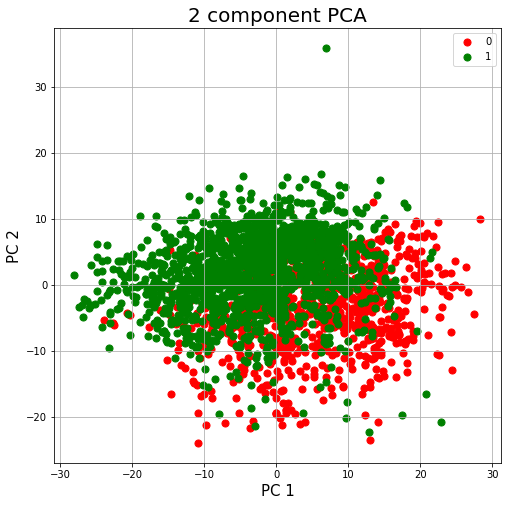

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Using PCA
from sklearn.decomposition import PCA

X_stand = StandardScaler().fit_transform(X) # Using fit_transform function on X data
pca = PCA(n_components = 2) # taking n_components = 2 for PCA (Principal Component Analysis)
principalComponents = pca.fit_transform(X_stand)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2']) # Creating principal DataFrame
finalDf = pd.concat([principalDf, y], axis = 1) # Using Principal Data frame and y column to get the final DF
fig = plt.figure(figsize = (8,8)) # plotting of the 2 components PCA

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15) # PC1 as x-axis
ax.set_ylabel('PC 2', fontsize = 15) # PC2 as y-axis
ax.set_title('2 component PCA', fontsize = 20) 
targets = [0, 1] # target values
colors = ['r', 'g'] # unique color for each target

# iterating target with unique colors
for target, color in zip(targets,colors):
   indicesToKeep = finalDf['Research Group'] == target
   ax.scatter(finalDf.loc[indicesToKeep, 'pc 1']
              , finalDf.loc[indicesToKeep, 'pc 2']
              , c = color
              , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
# importing libraries for K-best extraction
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# feature extraction
test = SelectKBest(score_func=f_classif, k=20)
fit = test.fit(X, y)
 
# summarize scores
set_printoptions(precision=3)
# print(fit.scores_)
features = fit.transform(X)
# summarize selected features
X_extracted_features = features


In [ ]:
X_extracted_features

array([[1.651, 2.27, 2.236, ..., 289.808994, 164.883411, 1762.601968],
       [1.482, 2.282, 2.039, ..., 282.548003, 155.958779, 1747.48186],
       [3.409, 2.627, 3.346, ..., 517.468495, 267.551975, 3047.069487],
       ...,
       [3.6, 2.668, 3.086, ..., 509.831714, 272.117535, 3149.045152],
       [3.346, 2.78, 3.337, ..., 485.96768, 252.774103, 3052.147532],
       [3.273, 2.725, 3.288, ..., 493.564096, 256.049864, 3070.015755]],
      dtype=object)

In [ ]:
# train test split in 9 : 1 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
# removing outliers using 
from sklearn.ensemble import IsolationForest

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(X_train)


# select all rows that are not outliers
mask = yhat != -1
X_train = X_train.iloc[mask, :]

y_train = y_train.iloc[mask]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# using Logistic Regression as ML-Model on our training-testing data
clf = LogisticRegression(solver = 'lbfgs')
clf.fit(X_train, y_train)  # perform Logistic Regression 
y_pred = clf.predict(X_test)  # make predictions


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Classification Report : Accuracy with Logistic Regression is 86.88%
report = classification_report(y_test, y_pred, output_dict=True)
reportdf = pd.DataFrame(report).transpose()
reportdf


precision    recall  f1-score     support
0              0.807692  0.768293  0.787500   82.000000
1              0.885542  0.907407  0.896341  162.000000
accuracy       0.860656  0.860656  0.860656    0.860656
macro avg      0.846617  0.837850  0.841921  244.000000
weighted avg   0.859380  0.860656  0.859764  244.000000

In [ ]:
from sklearn import svm
# using SVM as ML-Model with decision function : "ovo" on our training-testing data
clf = svm.SVC(decision_function_shape='ovo', verbose=True)  # create object for the class
y_train = [int(i) for i in y_train]
clf.fit(X_train, y_train)  # perform SVM
y_pred = clf.predict(X_test)  # make predictions

[LibSVM]

In [ ]:
# Classification Report : Accuracy with svm.SVC is 74%
report = classification_report(y_test, y_pred, output_dict=True)
reportdf = pd.DataFrame(report).transpose()
reportdf


precision    recall  f1-score     support
0              1.000000  0.024390  0.047619   82.000000
1              0.669421  1.000000  0.801980  162.000000
accuracy       0.672131  0.672131  0.672131    0.672131
macro avg      0.834711  0.512195  0.424800  244.000000
weighted avg   0.780518  0.672131  0.548465  244.000000

In [ ]:
# using svm.LinearSVC as ML-Model on our training-testing data
clf = svm.LinearSVC()
clf.fit(X_train, y_train)  # perform SVM
y_pred = clf.predict(X_test)  # make predictions



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Classification Report : Accuracy with Linear SVC is 84.42%
report = classification_report(y_test, y_pred, output_dict=True)
reportdf = pd.DataFrame(report).transpose()
reportdf


precision    recall  f1-score     support
0              0.348936  1.000000  0.517350   82.000000
1              1.000000  0.055556  0.105263  162.000000
accuracy       0.372951  0.372951  0.372951    0.372951
macro avg      0.674468  0.527778  0.311307  244.000000
weighted avg   0.781200  0.372951  0.243751  244.000000

In [ ]:
# using SVM with StandardardSca as ML-Model on our training-testing data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
 
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)  # perform SVM
y_pred = clf.predict(X_test)  # make predictions


In [ ]:
# Classification Report : Accuracy with Support Vector Machine SVC pipelined with Standard Scaler is 98% 
report = classification_report(y_test, y_pred, output_dict=True)
reportdf = pd.DataFrame(report).transpose()
reportdf


precision    recall  f1-score     support
0              0.975610  0.975610  0.975610   82.000000
1              0.987654  0.987654  0.987654  162.000000
accuracy       0.983607  0.983607  0.983607    0.983607
macro avg      0.981632  0.981632  0.981632  244.000000
weighted avg   0.983607  0.983607  0.983607  244.000000

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
clf = GaussianNB()
clf.fit(X_train, y_train)  # perform Gaussian Naive
y_pred = clf.predict(X_test)  # make predictions'


In [ ]:
# Classification Report : Accuracy with Gaussian Naive  is 77%
report = classification_report(y_test, y_pred, output_dict=True)
reportdf = pd.DataFrame(report).transpose()
reportdf


precision    recall  f1-score     support
0              0.609091  0.817073  0.697917   82.000000
1              0.888060  0.734568  0.804054  162.000000
accuracy       0.762295  0.762295  0.762295    0.762295
macro avg      0.748575  0.775821  0.750985  244.000000
weighted avg   0.794308  0.762295  0.768385  244.000000

In [ ]:
# train a DecisionTreeClassifier classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split = 40, random_state=0)
clf.fit(X_train, y_train)  # perform DecisionTreeClassifier
y_pred = clf.predict(X_test)  # make predictions



In [ ]:
# Classification Report : Accuracy with DecisionTreeClassifier  is 88.9%
report = classification_report(y_test, y_pred, output_dict=True)
reportdf = pd.DataFrame(report).transpose()
reportdf

precision    recall  f1-score     support
0              0.734694  0.878049  0.800000   82.000000
1              0.931507  0.839506  0.883117  162.000000
accuracy       0.852459  0.852459  0.852459    0.852459
macro avg      0.833100  0.858777  0.841558  244.000000
weighted avg   0.865365  0.852459  0.855184  244.000000

In [ ]:
# using random Forest Regressor as ML-Model on our training-testing data
clf = RandomForestRegressor(n_estimators=80, min_samples_split=100, verbose = True)  # create object for the class
clf.fit(X_train, y_train)  # perform random forest regressor

y_pred = clf.predict(X_test)  # make predictions
# # as predicted values are probability, we can generalize/convert them to two classes : 0 and 1
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished


In [ ]:
# all metrics reported on the testing, accuracy : 73% for given test data

print(y_pred)
y_test = [i for i in y_test]
print(y_test)

[1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 1.]
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 

In [ ]:
# Classification Report : Accuracy with random Forest Regressor is 93%
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        82
           1       0.94      0.93      0.94       162

    accuracy                           0.92       244
   macro avg       0.91      0.91      0.91       244
weighted avg       0.92      0.92      0.92       244



In [ ]:
# train a RandomForestClassifier classifier on the training set
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)  # perform RandomForestClassifier
y_pred = clf.predict(X_test)  # make predictions


In [ ]:
# Classification Report : Accuracy with RandomForestClassifier  is 95.5%
report = classification_report(y_test, y_pred, output_dict=True)
reportdf = pd.DataFrame(report).transpose()
reportdf


precision    recall  f1-score     support
0              0.925000  0.902439  0.913580   82.000000
1              0.951220  0.962963  0.957055  162.000000
accuracy       0.942623  0.942623  0.942623    0.942623
macro avg      0.938110  0.932701  0.935318  244.000000
weighted avg   0.942408  0.942623  0.942445  244.000000

In [ ]:
# PCA
# Standardization
from sklearn.preprocessing import StandardScaler
X_stand = StandardScaler().fit_transform(X)
# Using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=20) # Taking 20 components
principalComponents = pca.fit_transform(X_stand)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7', 'pc 8', 'pc 9',
                                                                 'pc 10', 'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 'pc 16', 'pc 17',
                                                                 'pc 18', 'pc 19', 'pc 20'])
finalDf = pd.concat([principalDf, y], axis = 1)

